# Image Pixelization with Differential Privacy

In [1]:
import random
import numpy as np
import image_util as iu
import dp_pixel as dp

In [2]:
def load(dataset, n=16):
    images = dataset.load_images(n)
    iu.display_image_grid(images)
    return images

In [3]:
def dp_pixelate_images(images, target_w, target_h, m, eps, noise_factor):
    noisy_images = [dp.dp_pixelate(I, target_w, target_h, m, eps, noise_factor) for I in images]
    iu.display_image_grid(noisy_images)

In [4]:
def vary_eps(images,target_w, target_h, m, noise_factor):
    I = random.choice(images)
    eps_vals = np.arange(1,0,-0.1)
    noisy_images = [dp.dp_pixelate(I, target_w, target_h, m, eps, noise_factor) for eps in eps_vals]
    titles=["{:.1f}".format(eps) for eps in eps_vals]
    iu.display_image_grid(noisy_images, titles=titles)

# AT&T Faces Dataset

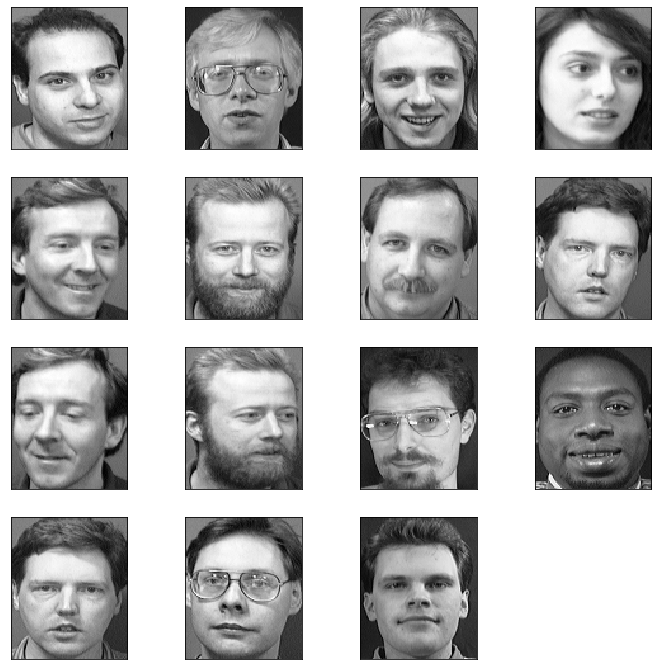

In [5]:
faces = load(iu.FacesDataset())

## Set the parameters

In [6]:
target_w = 23 # f_w = 4
target_h = 28 # f_h = 4
m = 10
eps = 0.5
noise_factor=0.1

## DP Pixelated Images

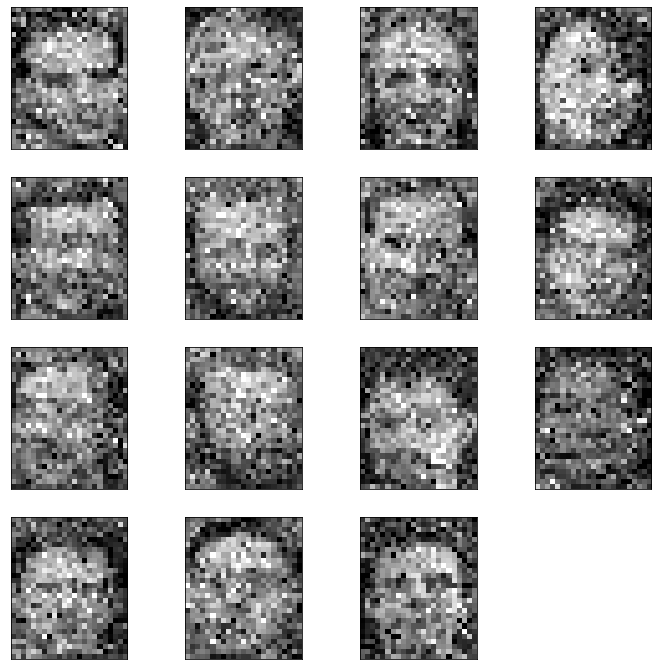

In [7]:
dp_pixelate_images(faces,target_w, target_h, m, eps, noise_factor)

## Decreasing $eps$ 1.0 $\rightarrow$ 0 by 0.1

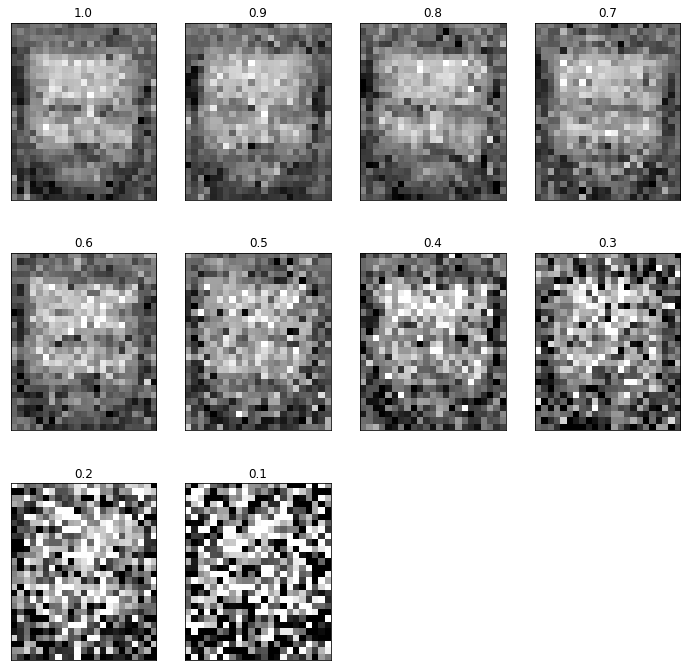

In [8]:
vary_eps(faces, target_w, target_h, m, noise_factor)

# ImageNet Dataset

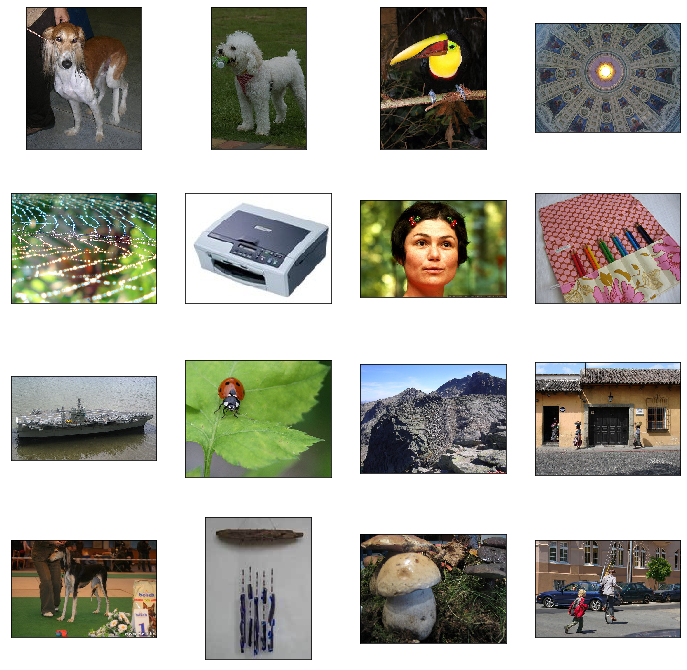

In [9]:
objects = load(iu.MiniImageNetDataset())

## Set the parameters

In [10]:
target_w = 84
target_h = 84
m = 10
eps = 0.5
noise_factor=0.1

## DP Pixelated Images

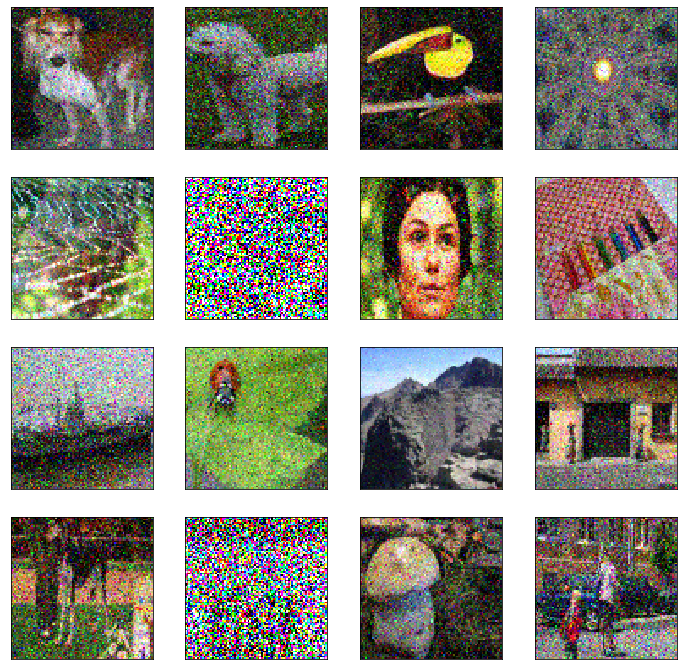

In [11]:
dp_pixelate_images(objects, target_w, target_h, m, eps, noise_factor)

## Decreasing $eps$ 1.0 $\rightarrow$ 0 by 0.1

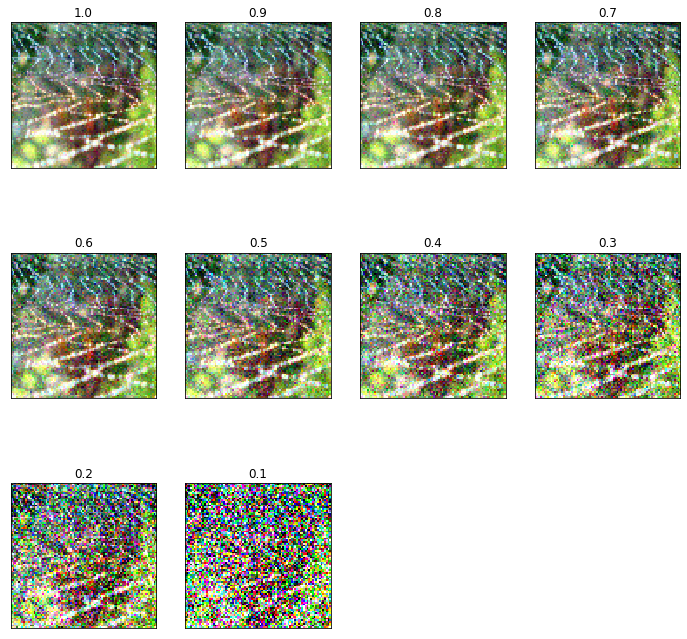

In [12]:
vary_eps(objects, target_w, target_h, m, noise_factor)

# Omniglot Dataset

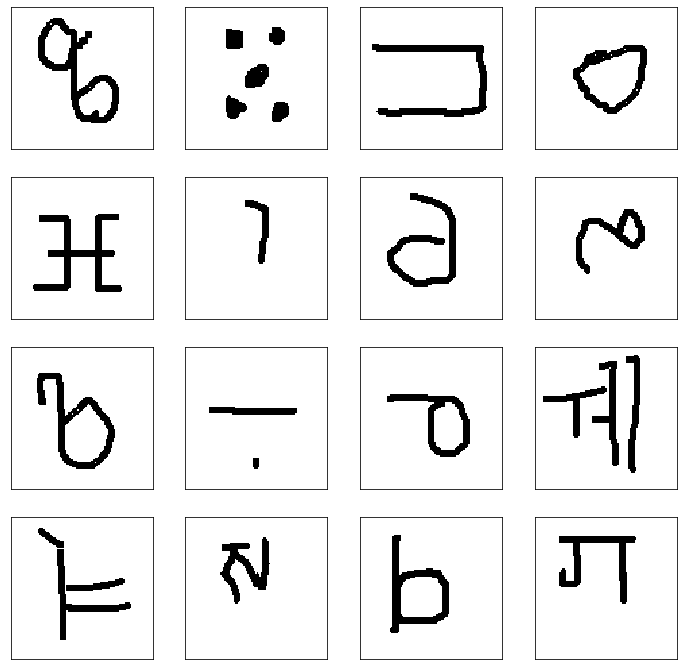

In [13]:
characters = load(iu.OmniglotDataset())

## Set the parameters



In [14]:
target_w = 28
target_h = 28
m = 10
eps = 0.5
noise_factor = 0.1

## DP Pixelate Images

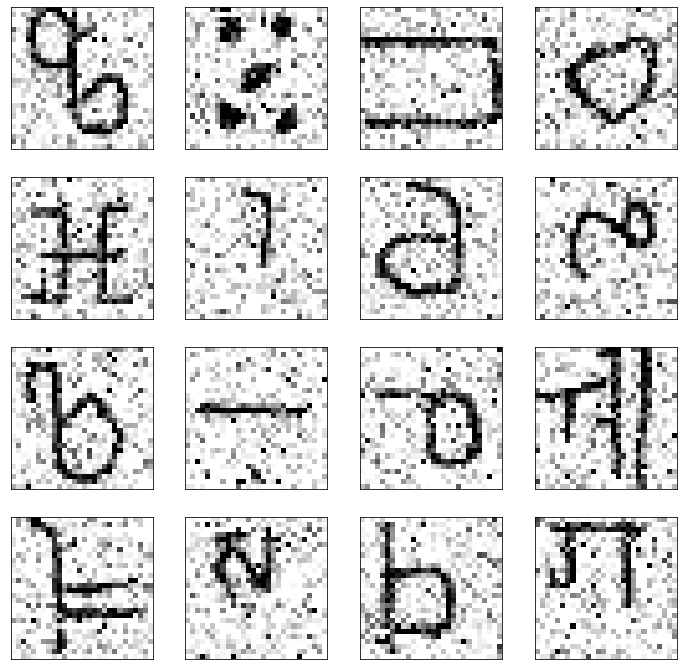

In [15]:
dp_pixelate_images(characters, target_w, target_h, m, eps, noise_factor)

## Decreasing $eps$ 1.0 $\rightarrow$ 0 by 0.1

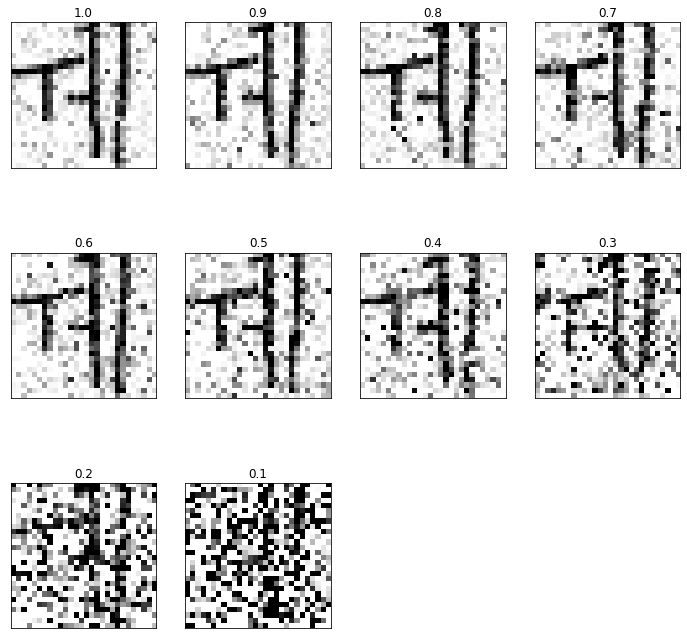

In [16]:
vary_eps(characters, target_w, target_h, m, noise_factor)